# Regresja liniowa

Na dzisiejszych zajęciach omówimy problem predykcji informacji i jego rozwiązanie poprzez wykorzystanie regresji liniowej.

Zadaniem regresji liniowej jest po prostu dopasowanie prostej linii do danych. Warto podkreślić, że regresja liniowa przyjmuje założenie, że związek między cechami a zmienną objaśnianą jest mniej więcej liniowy. Regresja liniowa nie jest jedynym rodzajem regresji aczkolwiek jest to najprostsza wersja.

Regresja może nam pomóc w predykcji (przewidzeniu) wartości jakiejś zmiennej objaśnianej (zależnej) na podstawie jakiś cech (zmiennych niezależnych).

## Rozgrzewka

Przeanalizuj poniższy wykres:

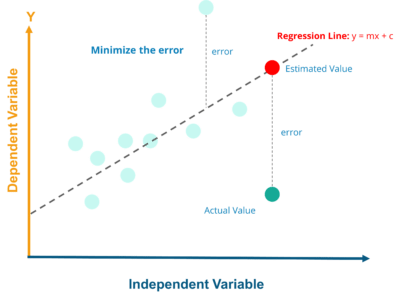

In [1]:
from IPython.display import Image
Image(filename='reglin.png')

1. Dlaczego możemy zastosować regresję liniową do przewidywania informacji o danych?

2. Co musimy znaleźć, aby móc dokonywać predykcji informacji? Co musimy mieć na uwadze, aby to znaleźć?

## Przykład

Załóżmy, że mamy uczniów, którzy pracują w kursie e-learningowym i ciekawi nas, czy zakończą pracę w tym kursie z sukcesem, tzn. zdobędą jak najlepszy wynik w końcowym teście zaliczeniowym. Aktualne informacje, które posiadamy, to czas spędzony w tym kursie liczony w minutach, liczba rozwiązanych ćwiczeń, liczba elementów, których uczeń jeszcze nie odwiedził. Wiemy też, kiedy uczeń zaczął się uczyć i ile razy wchodził do kursu. Każdy uczeń ma też świadomość, że mają określony termin, do kiedy muszą podejść do końcowego testu zaliczeniowego.

Powiedzmy, że na początek przyjrzymy się jednej z informacji - liczbie rozwiązanych ćwiczeń. Załóżmy, że w kursie jest 20 ćwiczeń do rozwiązania a wynik w końcowym teście zaliczeniowym badamy w procentach. Rok temu mieliśmy innych uczniów, którzy też pracowali z tym kursem e-learningowym i mamy informację o ich wynikach:

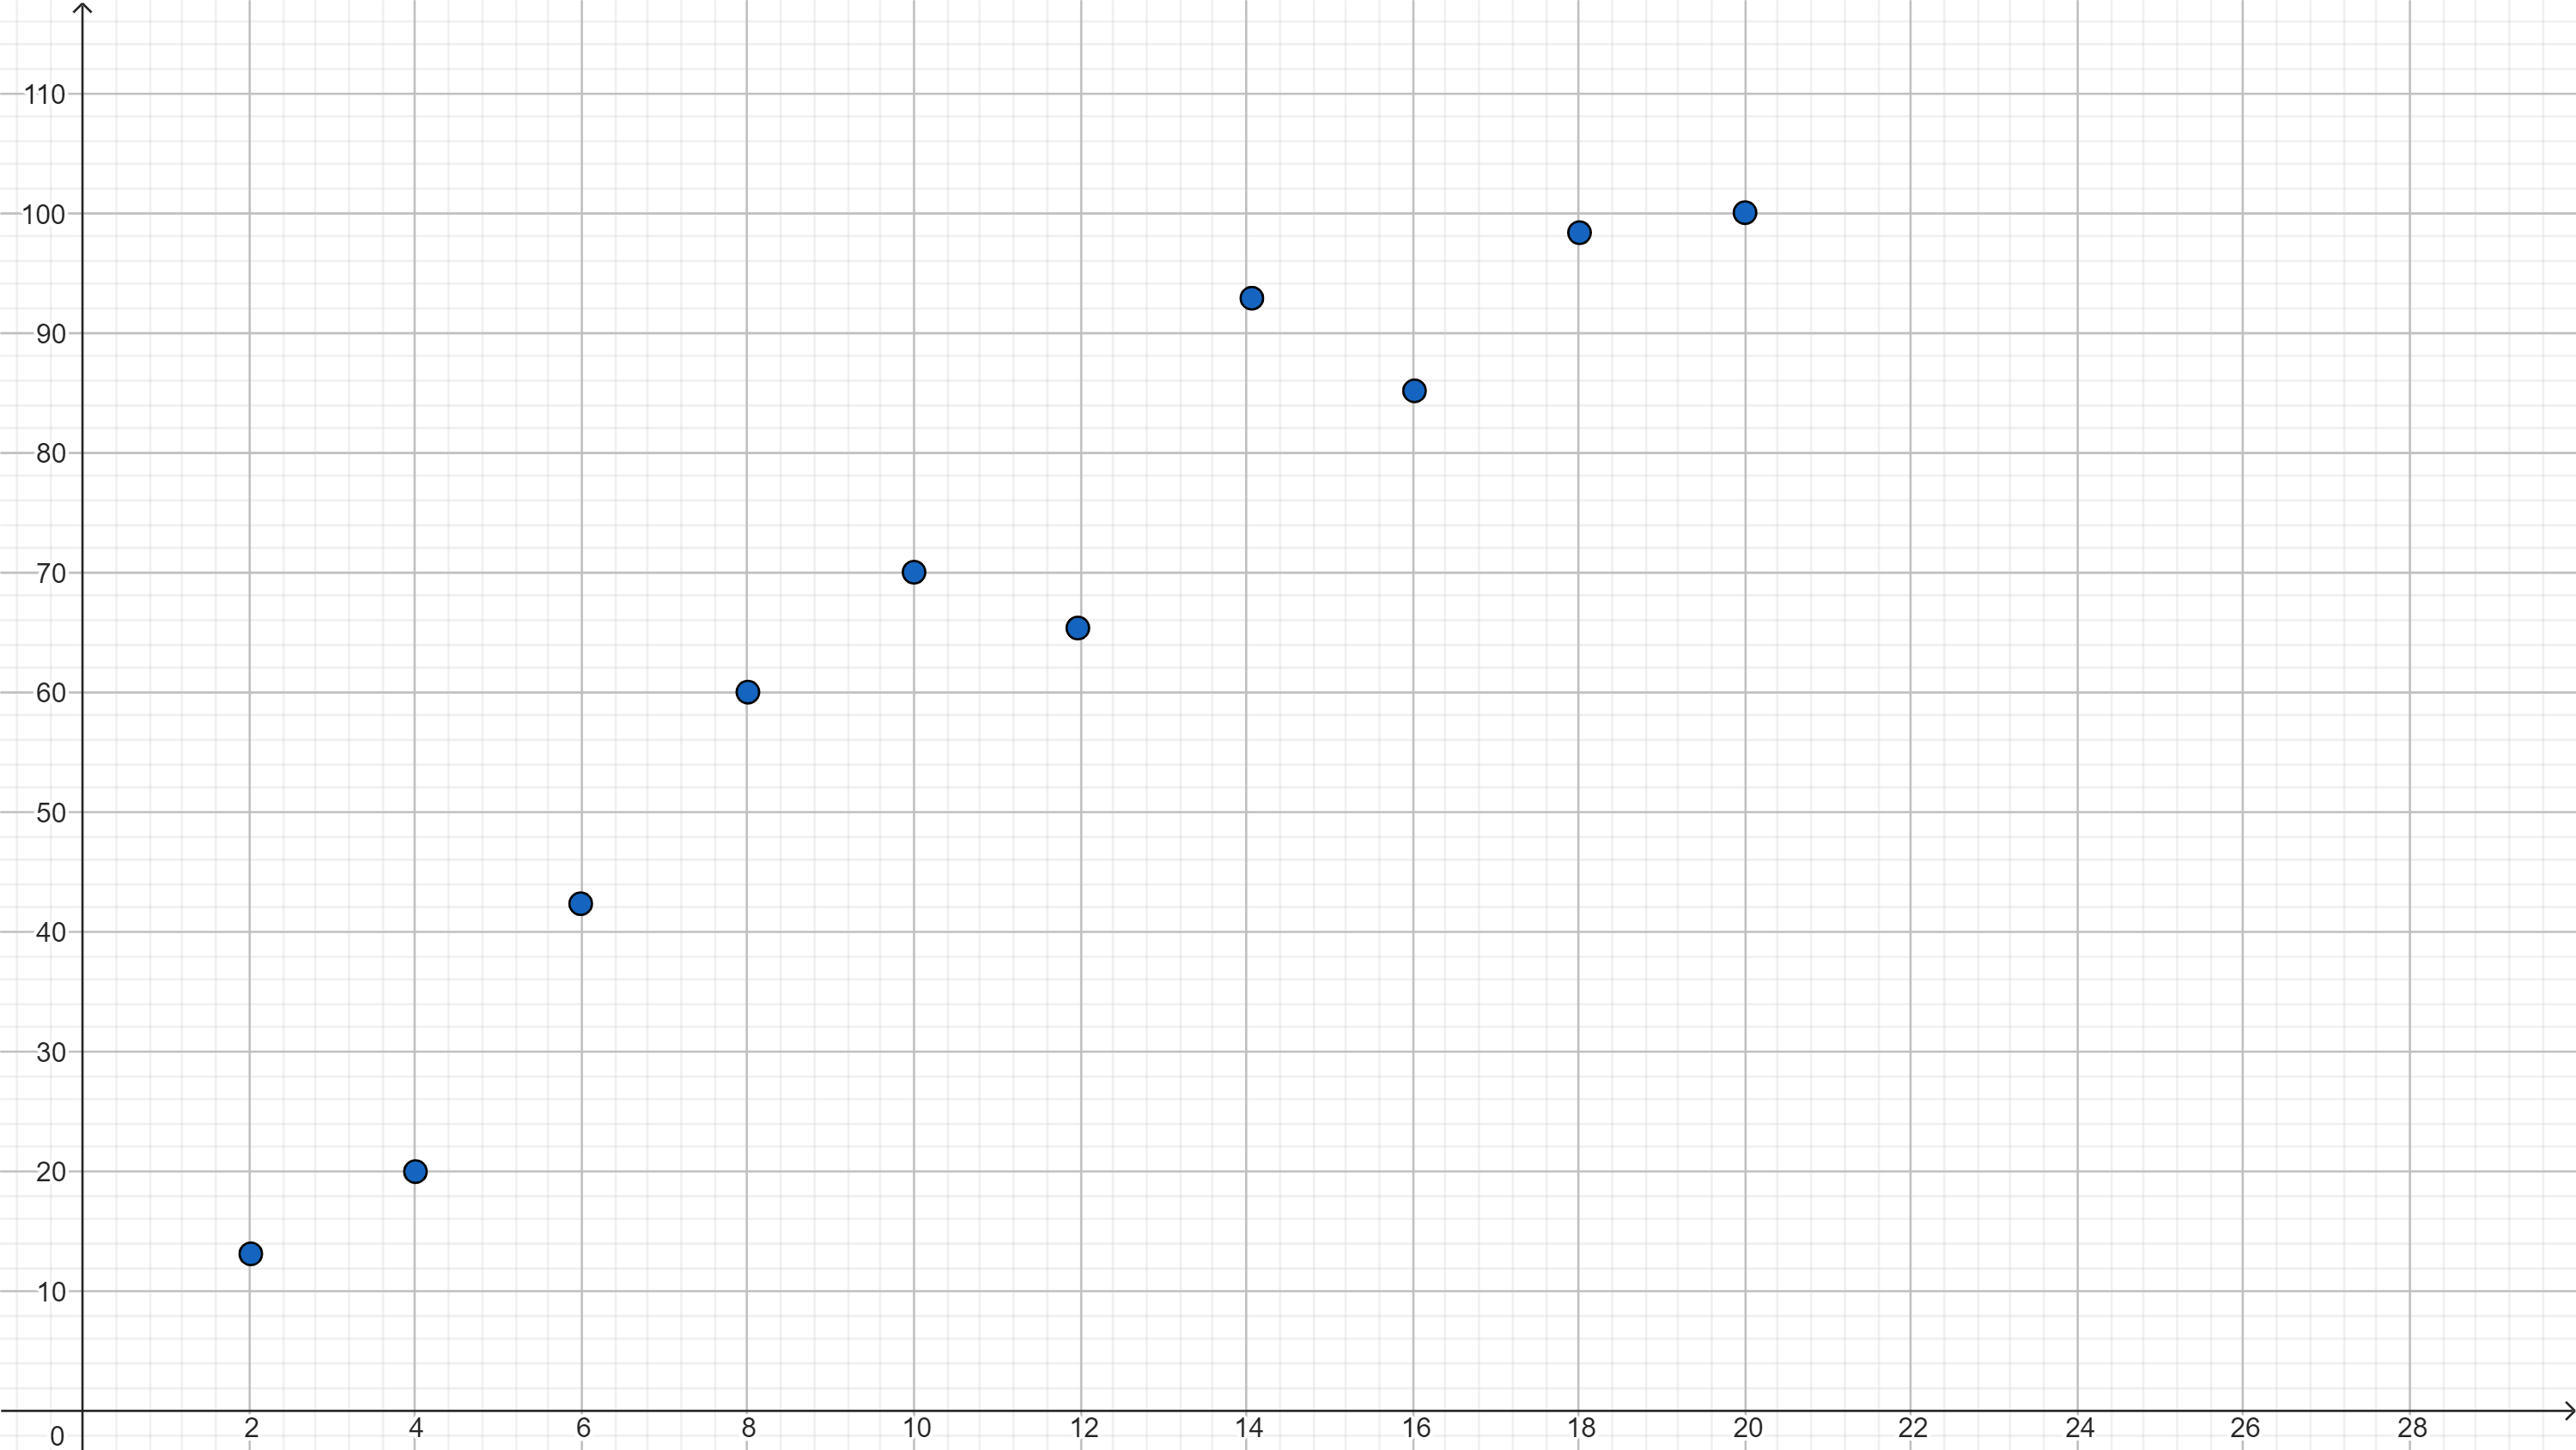

In [2]:
from IPython.display import Image
Image(filename='wyniki.png')

Zauważmy, że mamy tutaj pewien trend. W przybliżeniu możemy stwierdzić, że im większa liczba rozwiązanych ćwiczeń w kursie tym większy wynik w końcowym teście zaliczeniowym. Zatem moglibyśmy spróbować wyznaczyć funkcję, która pokazywałaby ten trend. Najprościej będzie wyznaczyć zależność liniową, czyli pewną funkcję liniową, która nam przybliży trend. Musimy znaleźć taką funkcję, dla której będziemy mieć sytuację, że dla jak największej liczby argumentów będziemy mieć jak najmniejszą różnicę pomiędzy wartością, którą zwróci funkcja a wartością rzeczywistą, którą mamy na powyższym wykresie.

Zatem naszym zadaniem jest wyznaczenie pewnej funkcji liniowej postaci:
$f(x)=ax+b$, gdzie:

$x$ - liczba rozwiązanych ćwiczeń w kursie

$f(x)$ - przybliżony wynik osiągnięty w końcowym teście zaliczeniowym

$a$ - współczynnik kierunkowy naszej funkcji **regresji liniowej**

$b$ - wyraz wolny

Powstaje pytanie jak wyznaczyć wartości $a$ i $b$. Istnieją algorytmy numeryczne, które pozwalają znaleźć przybliżone wartości. Jednym z nich jest tzw. algorytm gradientu prostego. Natomiast nie będziemy go w tym momencie omawiać.

Na zajęciach ze statystyki będziecie Państwo (jeśli jeszcze nie mieliście statystyki) uczyć się jak wyznaczać te szukane wartości wg pewnych wzorów:

$a=\frac{\sum_{i=1}^{n}\left ( x_{i}-\overline{x} \right )\left ( y_{i}-\overline{y} \right )}{\sum_{i=1}^{n}\left ( x_{i}-\overline{x} \right )^{2}}$

$b=\overline{y}-a\overline{x}$

gdzie:

$n$ - liczba punktów na naszym wykresie

$(x_{i}, y_{i})$ to i-ty punkt na naszym wykresie

$\overline{x}$ to średnia arytmetyczna wszystkich argumentów z naszego wykresu (liczby rozwiązanych ćwiczeń)

$\overline{y}$ to średnia arytmetyczna wszystkich wartości z naszego wykresu (wyników w teście)

Co do zasady te wzory będą (lub były) wyjaśniane na zajęciach ze statystyki, natomiast na ten moment powinna wystarczyć nam informacja, że wynikają one z faktu, że szukamy takiej funkcji, dla której różnice między obliczoną a rzeczywistą wartością są jak najmniejsze. Różnice te mogą być ujemne, dlatego bada się kwadraty różnic, żeby nie było sytuacji, że różnice pewnych wartości się wyzerują i przez to znajdziemy błędną funkcję regresji. Taką metodę nazywa się **metodą najmniejszych kwadratów** a same różnice nazywa się **resztami** lub **residuami**.

Gdybyśmy dla naszych danych wyznaczyli zgodnie z powyższymi wzorami wartość funkcji regresji liniowej otrzymalibyśmy prostą jak na poniższym wykresie:

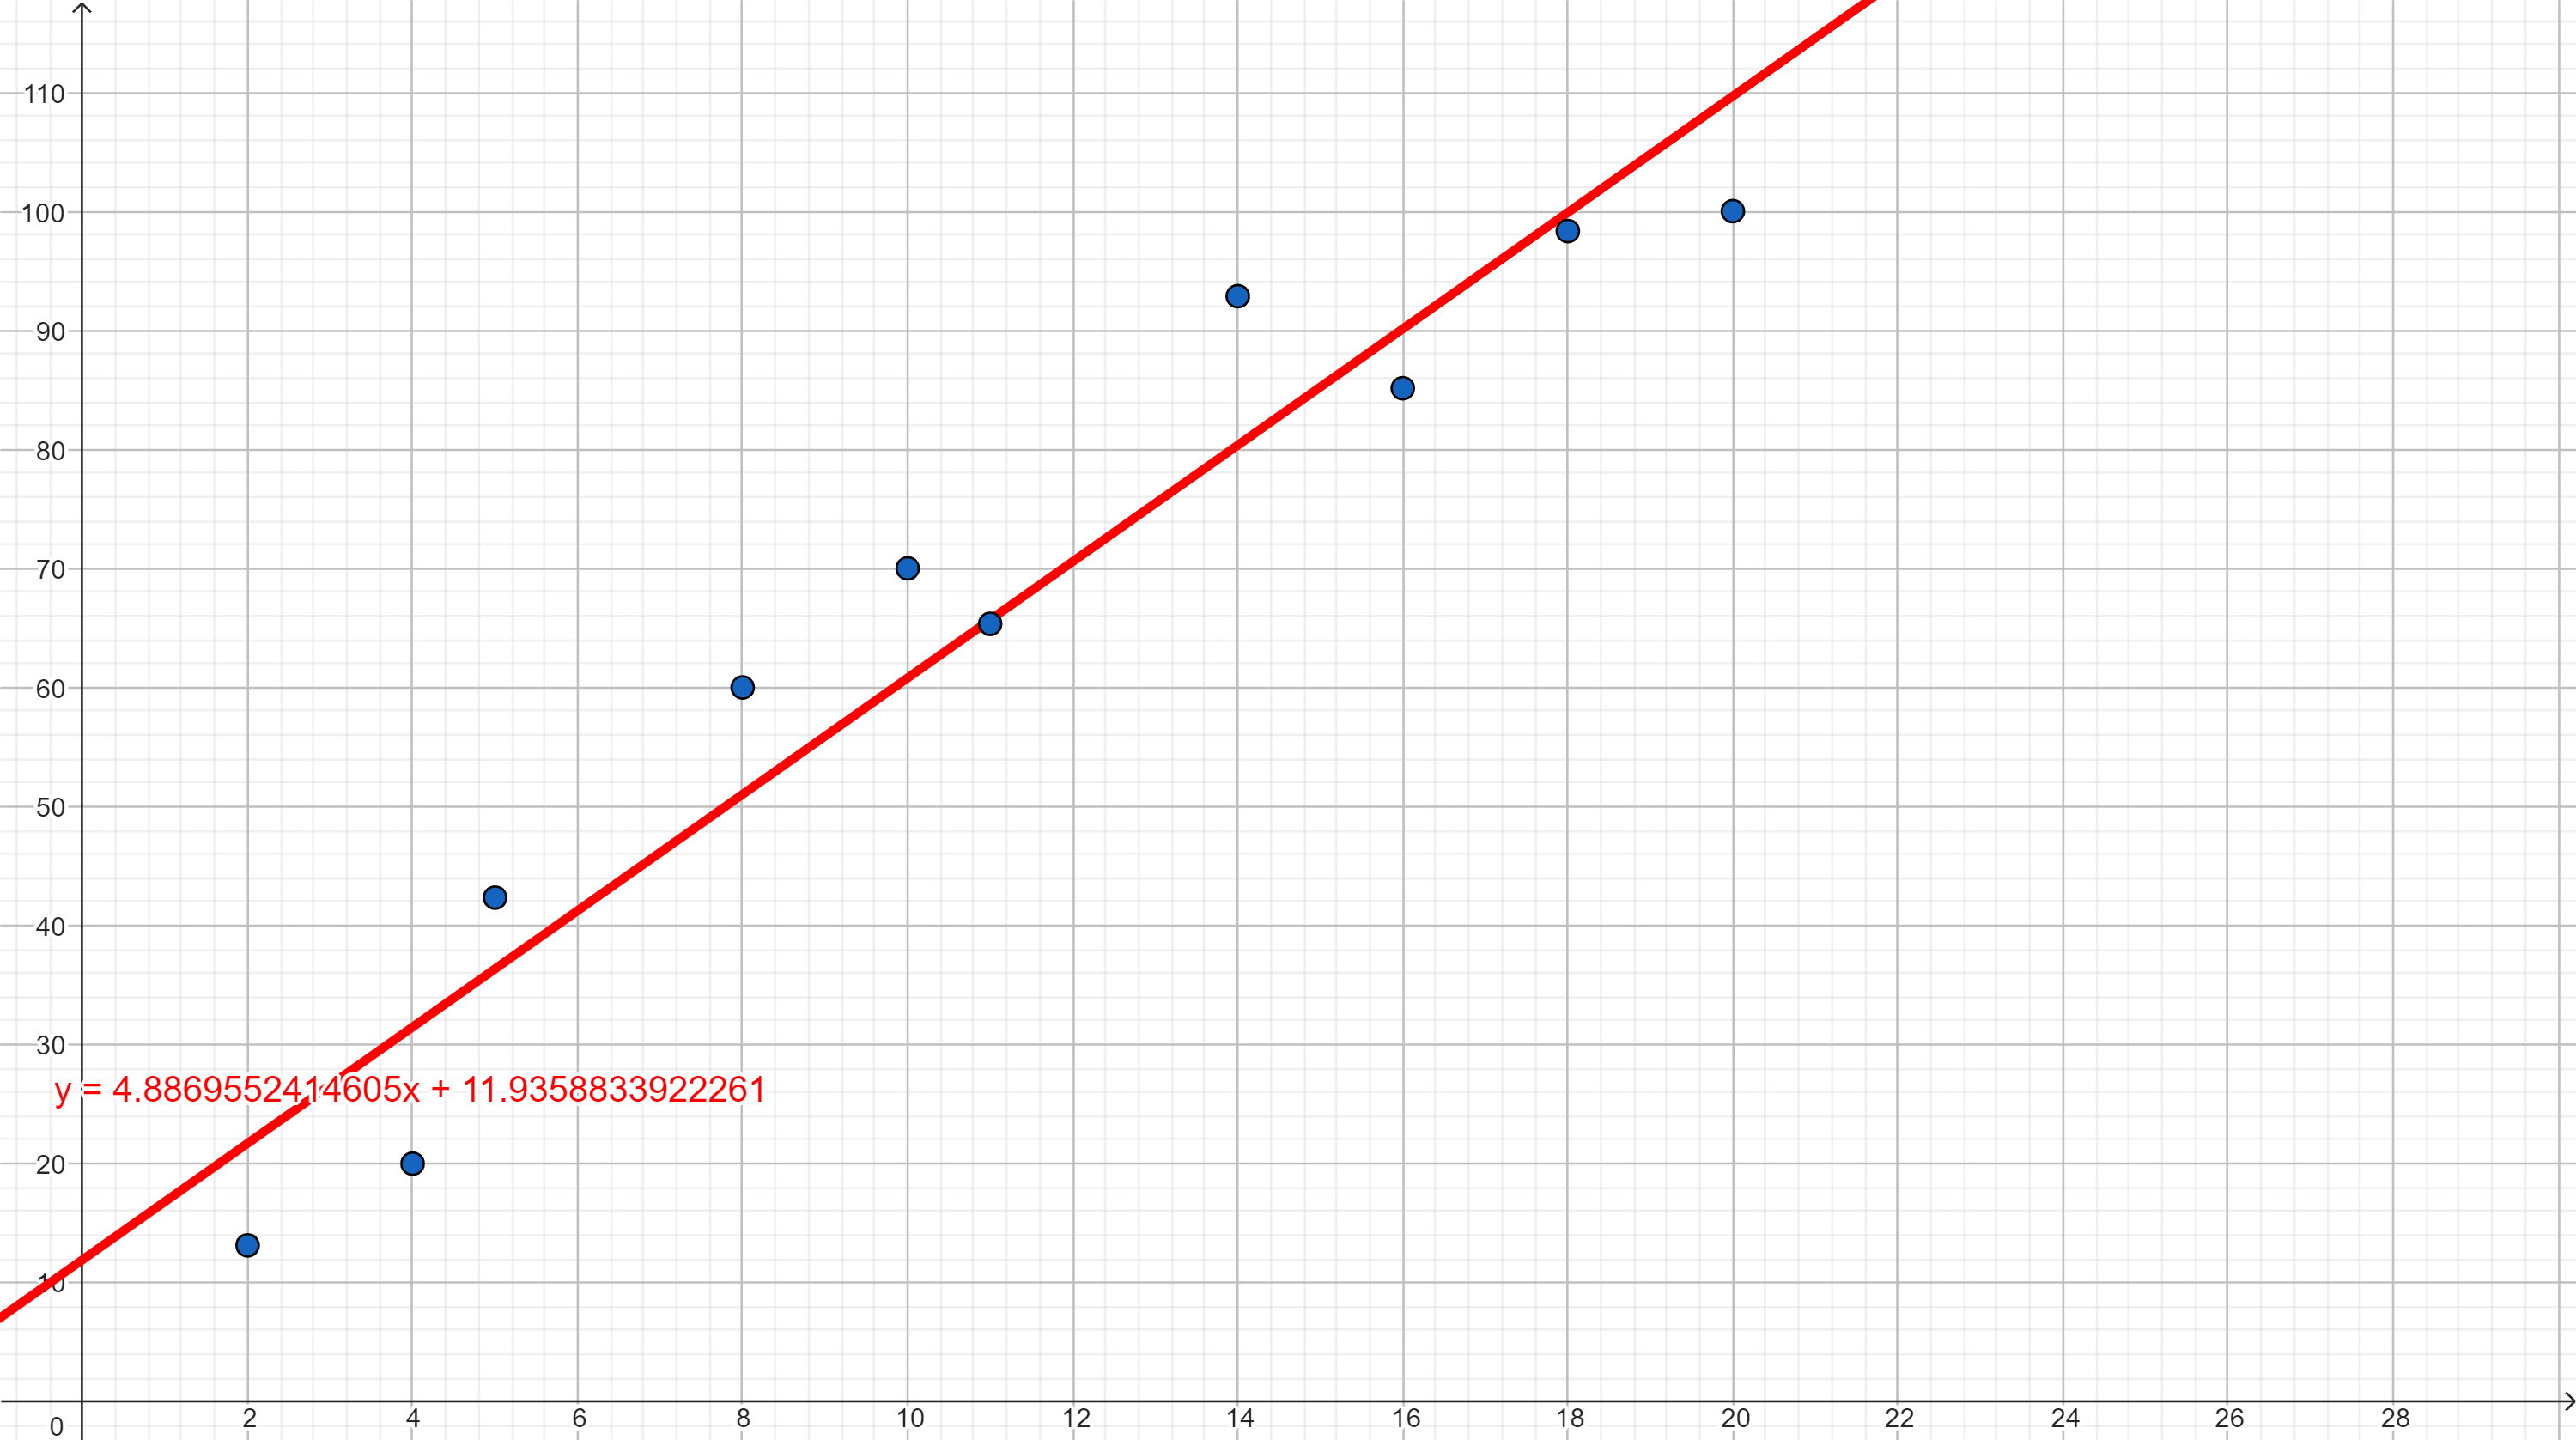

In [3]:
from IPython.display import Image
Image(filename='wyniki_reglin.png')

Można to interpretować następująco:

- ponieważ wyraz wolny $b$ w przybliżeniu wynosi 11,94 to można powiedzieć, że jeśli uczeń nie rozwiąże ćwiczeń, to jego wynik na teście końcowym wyniesie właśnie ok. 12%;
- ponieważ współczynnik kierunkowy $a$ jest dodatni to oznacza, że wraz ze wzrostem liczby rozwiązanych ćwiczeń będzie rósł wynik na teście końcowym;
- ponieważ współczynnik kierunkowy $a$ wynosi ok. 4,89, oznacza to, że wraz z każdym kolejnym rozwiązanym ćwiczeniem wynik w teście końcowym wzrasta o ok. 4,89%.

To, czy powyższe wnioski są w naszym problemie sensowne to inna sprawa. Regresja liniowa ma swoje plusy i minusy:

### Zalety:
- Prostota – dzięki swojej prostocie wykorzystywana jest w wielu dziedzinach: od matematyki, poprzez ekonomię, aż po geodezję,
- interpretowalność – dzięki prostym wzorom bardzo łatwo wyjaśnić biznesowi lub innym osobom, jak dana cecha wpływa na wynik modelu,
- szybkość – nawet przy dużej liczbie danych dla prostych algorytmów wyniki dostajemy prawie od razu.

### Wady:
- Prostota (wcześniej zaleta ;P) – świat nie składa się z prostych liniowych zależności. Gdyby tak było, to pewnie nie byłoby takiego rozwoju uczenia maszynowego.



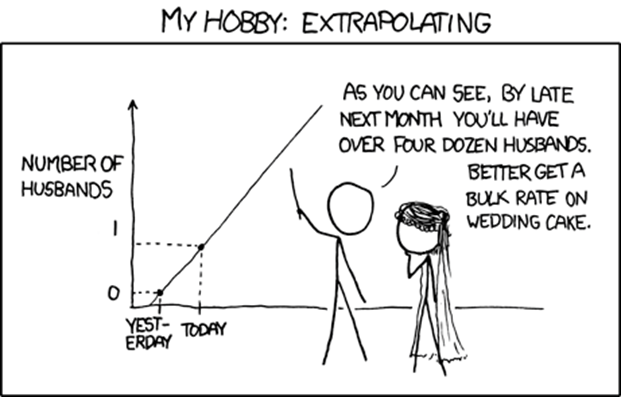

In [4]:
from IPython.display import Image
Image(filename='mem.png')

Źródło memu: https://xkcd.com/

Oczywiście mamy więcej informacji niż liczba rozwiązanych ćwiczeń, więc można by było spróbować wyznaczyć funkcję wielu zmiennych, w której każdy ze składników byłby jakąś funkcją liniową. To już spróbujemy zrobić korzystając z możliwości języka Python i dostępnych dla niego bibliotek.

## Przykład kodu na regresję liniową

Zaczynamy od importu pewnych bibliotek, które ułatwiają pracę z danymi i uruchamianie algorytmów uczenia maszynowego:

In [5]:
import pandas as pd
import numpy as np
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Wczytajmy dane i podejrzyjmy nasz zbiór danych:

In [6]:
data = pd.read_csv('data.csv', sep=';')
data

cwiczenia  czas_min  wejscia  nieodwiedzone  czas_do_testu_godziny    test
0          4        12        1              1                     20   20.00
1          8        25        3              3                     36   60.00
2         14        48        3              1                     33   92.86
3         11        37        5              0                     42   65.34
4          5        29        2              0                     22   42.35
5          2         5        1              4                      5   13.14
6         16        36        7              1                     47   85.13
7         18        55        5              0                     39   98.33
8         20        48        4              0                     45  100.00
9         10        42        7              1                     37   70.00

Teraz obliczamy podstawowy model regresji liniowej i wyliczamy błąd (czyli jak bardzo obliczone wartości funkcji regresji różnią się od tych rzeczywistych) - weźmy miarę RMSE (omówimy ją na późniejszych zajęciach - na razie zapamiętajmy: im niższy błąd tym lepiej):

In [7]:
model = LinearRegression()
 
X = data[['cwiczenia']]
y = data['test']
 
model.fit(X,y, sample_weight=None)
y_pred = model.predict(X)
 
print('Współczynnik a: ', model.coef_[0])
print('Wyraz wolny: ', model.intercept_)
print('Błąd: Root Mean Squared Error (RMSE): %.2f'% np.sqrt(mean_squared_error(y, y_pred)))


Współczynnik a:  4.8869552414605435
Wyraz wolny:  11.935883392226131
Błąd: Root Mean Squared Error (RMSE): 8.27


A co by było jakbyśmy wzięli dodatkowo pod uwagę czas spędzony w kursie:

In [8]:
X = data[['cwiczenia', 'czas_min']]
y = data['test']
 
model.fit(X,y, sample_weight=None)
y_pred = model.predict(X)
 
print('Współczynnik przy argumencie "cwiczenia": ', model.coef_[0])
print('Współczynnik przy argumencie "czas_min": ', model.coef_[1])
print('Wyraz wolny: ', model.intercept_)
print('Błąd: Root Mean Squared Error (RMSE): %.2f'% np.sqrt(mean_squared_error(y, y_pred)))


Współczynnik przy argumencie "cwiczenia":  2.793448759670846
Współczynnik przy argumencie "czas_min":  0.9017691542564438
Wyraz wolny:  4.156132897112705
Błąd: Root Mean Squared Error (RMSE): 5.19


Mamy lepszy wynik - błąd jest niższy :)

A jak wyglądają nasze wyznaczone wartości funkcji regresji?

In [9]:
data_with_y_pred = data.copy()
data_with_y_pred['y_pred'] = y_pred
data_with_y_pred

cwiczenia  czas_min  wejscia  nieodwiedzone  czas_do_testu_godziny    test  \
0          4        12        1              1                     20   20.00   
1          8        25        3              3                     36   60.00   
2         14        48        3              1                     33   92.86   
3         11        37        5              0                     42   65.34   
4          5        29        2              0                     22   42.35   
5          2         5        1              4                      5   13.14   
6         16        36        7              1                     47   85.13   
7         18        55        5              0                     39   98.33   
8         20        48        4              0                     45  100.00   
9         10        42        7              1                     37   70.00   

       y_pred  
0   26.151158  
1   49.047952  
2   86.549335  
3   68.249528  
4   44.274682  
5   14.251876  
6   81.315003  
7  104.035514  
8  103.310027  
9   69.964925

## Źródła

- https://miroslawmamczur.pl/jak-dziala-regresja-liniowa-i-czy-warto-ja-stosowac/

## Zadanie 1.

Dla całego zbioru danych oblicz sumę kwadratów róźnic pomiędzy kolumnami **test** i **y_pred**. Wynik zaokrąglij do dwóch miejsc po przecinku (pamiętaj, że od 5 zaokrąglamy w górę). Podpowiedź:

- `data_with_y_pred['nazwa_kolumny'].size` - liczba elementów (wierszy) w danej kolumnie

- `data_with_y_pred['nazwa_kolumny'][0]` - pierwszy (indeksujemy od zera) element (wiersz) kolumny

Konkretne zadanie: napisz funkcję o nazwie `fun1()`, która zwróci oczekiwany wynik. Kod tej funkcji wklej na Moodle'u w aktywności o nazwie **Regresja liniowa - zadanie 1**. Na Moodle'u poza powyższym zbiorem danych kod będzie sprawdzony na innym zbiorze danych, więc nie można napisać prostej funkcji, która zwróci wartość obliczoną np. na kartce - niestety trzeba napisać funkcję obliczającą poszukiwaną wartość ;)

Dla powyższej sytuacji, gdzie mamy regresję liniową dwóch zmiennych wynik powinien wynosić **269.08**.

Jeżeli Twój kod nie działa a nie masz pomysłu, jak go naprawić, wrzuć na Moodle'u to, co masz - zostanie to ocenione ręcznie :)

Tutaj możesz napisać swój kod i go testować:

In [10]:
### poniżej wpisz swój kod i naciśnij Shift+Enter



## Zadanie 2.

Wejdź na Moodle'a do aktywności **Regresja liniowa - zadanie 2** i odpowiedz na zadane tam pytania dotyczące kodu i problemu przedstawionego na dzisiejszych zajęciach. Poniżej możesz pisać kod, jeśli zajdzie taka potrzeba i go testować. Możesz też edytować kod, który jest wyżej w materiałach i go testować :)

In [11]:
### poniżej wpisz swój kod i naciśnij Shift+Enter

